<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_exatas/blob/main/CN_Modulo5_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Interpolação via matriz de Vandermonde

O código a seguir ilustra como obter os coeficientes de um polinômio interpolador para um dado conjunto de valores através da resolução do sistema linear com a matriz dos coeficientes A de **Vandermonde**.


>$A x = b \rightarrow
 \begin{pmatrix}
  1 & x_0 & \cdots & x_0^n \\
  1 & x_1 & \cdots & x_1^n \\
  \vdots  & \vdots & \ddots & \vdots  \\
  1 & x_n & \cdots & x_n^n
 \end{pmatrix}
 \begin{pmatrix}
  a_0 \\
  a_1 \\
  \vdots   \\
  a_n
 \end{pmatrix}
 =
 \begin{pmatrix}
  f(x_0) \\
  f(x_1) \\
  \vdots   \\
  f(x_n)
 \end{pmatrix}
 $

 onde: $x_i, \forall i = 0, 1, ..., n$ são os **n+1 pontos** distintos de **f(x)**.

A solução desse sistema com **n+1 equações** e **n+1 variáveis** irá resultar na obtenção dos coeficientes do seguinte polinômio de **grau n**:

 $p_n(x) = a_0 + a_1x + a_2x^2 + ... + a_nx^n$.


> O polinômio $p_n(x)$ é uma aproximação **g(x)** da função **f(x)**.

In [ ]:
import numpy as np

def sistemaVander(x,y):
  n = len(x)
  A = np.empty((n,n))
  b = np.empty((n))
  for i in range(0,n):
    A[i,0] = 1
    for j in range(1,n):
      A[i,j] = A[i,j-1]*x[i]
    b[i]   = y[i]

  return A, b

# Dados do problema.
x  = [-1, 0, 2]
y  = [4, 1, -1]
A, b = sistemaVander(x,y)
x  = np.linalg.solve(A,b)
print(A)
print(b)
print(x)
print("Polinômio interporlador obtido:")
n = len(x)
s = ""
for i in range(0,n):
  if (i < (n-1)):
    s = s + (str(x[i])+"*x^"+str(i)+" + ")
  else:
    s = s + str(x[i])+"*x^"+str(i)
    print(s)

[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  2.  4.]]
[ 4.  1. -1.]
[ 1.         -2.33333333  0.66666667]
Polinômio interporlador obtido:
0.9999999999999996*x^0 + -2.3333333333333335*x^1 + 0.6666666666666667*x^2


# 2. Interpolação via forma de Lagrange

Ao invés de obter explicitamente a expressão da função g(x) que interpola f(x) em um conjunto de pontos dados, este programa usa uma forma implícita. Nesse forma implícita basta fornecer o valor xp para se obter o valor g(xp) correspondente.

A expressão geral do polinômio de **grau n** na forma de Lagrange é dada por:

$p_n(x) = \displaystyle \sum_{k=0}^N y_k L_k(x)$

onde:

$L_k(x) = \frac{\displaystyle\prod_{j=0,j \neq k}^{n} (x - x_j)}{\displaystyle\prod_{j=0,j \neq k}^{n} (x_k - x_j)}$

Por exemplo, sejam os dados fornecidos pela seguinte tabela:


>  x | -1  |  0  |  2
>--- | --- | --- | ---
>f(x)|  4  |  1  | -1


Um polinômio de grau 2, na forma de Lagrange, que interpola nos 3 pontos dados será obtido com:


$p_2(x) = y_0L_0(x) + y_1L_1(x) + y_2L_2(x)$

onde:

$L_0(x) = \frac{(x - x_1) (x - x_2)}{ (x_0 - x_1) (x_0 - x_2)}$,

$L_1(x) = \frac{(x - x_0) (x - x_2)}{ (x_1 - x_0) (x_1 - x_2)}$,

$L_2(x) = \frac{(x - x_0) (x - x_1)}{ (x_2 - x_0) (x_2 - x_1)}$



Entre com xp: 0.5
g(0.500) = 0.000


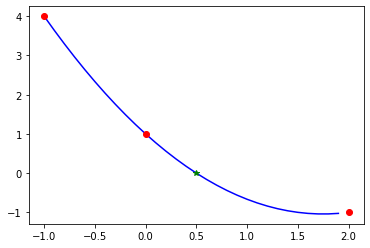

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def interpLagrange(xp,x,y,grau):
  # Valor inicial de g(xp).
  yp = 0
  # Interpolação de Lagrange
  for k in range(0,n+1):
    p = 1
    for j in range(0,n+1):
      if k != j:
        p = p*(xp - x[j])/(x[k] - x[j])

    yp = yp + p * y[k]

  return yp

# Dados do problema.
x = [-1, 0, 2]
y = [4, 1, -1]

# Ponto da interpolação
xp = float(input('Entre com xp: '))
# Grau da interpolação.
n = 2
# Interpolação de Lagrange.
yp = interpLagrange(xp,x,y,n)

# Valor interpolado encontrado
print('g(%.3f) = %.3f' % (xp, yp))

t  = np.arange(-1.0, 2.0, 0.1)
yt = []
for i in t:
  yt.append(interpLagrange(i,x,y,n))
plt.plot(t,yt,'b-')
plt.plot(x,y,'ro')
plt.plot(xp,yp,'g*')
plt.show()

# 3. Interpolação forma de Newton

O programa a seguir fornece o cálculo da interpolação através do cálculo de diferenças divididas e o uso do produto de variáveis para cálculo dos sucessivos coeficientes do polinômio para avaliação em um dado **xp**.


As diferenças divididas podem ser encontradas obtendo-se a seguinte tabela:


Por exemplo, a partir de 3 coordenadas $(x,f(x))$ é possível construir a seguinte tabela:


>  x  | Ordem 0 (f(x))|  ------------------Ordem 1-------------------   |  --------------------Ordem 2-----------------------
>---  | ---            | ---    | ---
>  -1 |  $f[x_0] = 4$  |$f[x_0,x_1]=(f[x_1]-f[x_0])/(x_1-x_0) = (1-4)/(0+1) = -3$        |  
>   0 |  $f[x_1] = 1$  |  | $f[x_0, x_1, x_2] =
(f[x_1, x_2]-f[x_0, x_1])/(x_2-x_0)=
(-1+3)/(2+1) = 2/3$
>   2 |  $f[x_2]-1$    | $f[x_1,x_2]=(f[x_2]-f[x_1])/(x_2-x_1) = (-1-1)/(2-0) = -1$       |


O segundo passo é calcular a expressão $p_n(x)$ através das diferenças divididas dada por:

$p_n(x) = f(x_0) + (x - x_0) f[x_0,x_1] + (x - x_0)(x - x_1)f[x_0,x_1,x_2] + ...+ (x - x_0)(x - x_1)...(x - x_{n-1}) f[x_0,x_1,...,x_n]$.

Para o exemplo dado:

$p_2(x) = 4 + (x - (-1)) (-3) + (x - (-1))(x - (0))(2/3) = 1 - 7/3x + 2/3x^2$






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def interpNewton(x, y, xi):
  #Número de dados
  n = len(x)
  #Inicialização da diferença dividida: n x n
  fdd = [[None for x in range(n)] for x in range(n)]
  #Valores da função f(X) em vários pontos
  yint = [None for x in range(n)]

  #Encontrando diferenças divididas.
  for i in range(n):
    fdd[i][0] = y[i]
  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])

  # Imprimindo diferenças divididas.
  fdd_table = pd.DataFrame(fdd)
  print(fdd_table)

  #Interpolação para xi.
  xterm = 1
  yint = fdd[0][0]
  for order in range(1, n):
    xterm = xterm * (xi - x[order-1])
    yint = yint + fdd[0][order]*xterm

  #Retornando g(xi).
  return yint


x  = [-1, 0, 2]
y  = [4, 1, -1]
xp = 0.5
yp = interpNewton(x, y, xp)

# Valor interpolado encontrado
print('g(%.3f) = %.3f' % (xp, yp))

   0    1         2
0  4 -3.0  0.666667
1  1 -1.0       NaN
2 -1  NaN       NaN
g(0.500) = 0.000


g(0.500) = 0.000


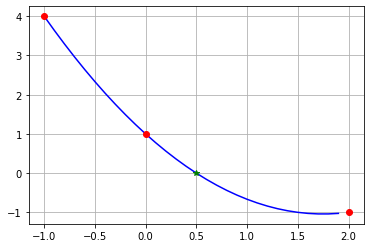

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def interpNewton(x, y, xi):
  #Número de dados
  n = len(x)
  #Inicialização da diferença dividida: n x n
  fdd = [[None for x in range(n)] for x in range(n)]
  #Valores da função f(X) em vários pontos
  yint = [None for x in range(n)]

  #Encontrando diferenças divididas.
  for i in range(n):
    fdd[i][0] = y[i]
  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])

  # Imprimindo diferenças divididas.
  fdd_table = pd.DataFrame(fdd)
  #print(fdd_table)

  #Interpolação para xi.
  xterm = 1
  yint = fdd[0][0]
  for order in range(1, n):
    xterm = xterm * (xi - x[order-1])
    yint = yint + fdd[0][order]*xterm

  #Retornando g(xi).
  return yint


x  = [-1, 0, 2]
y  = [4, 1, -1]
xp = 0.5
yp = interpNewton(x, y, xp)

# Valor interpolado encontrado
print('g(%.3f) = %.3f' % (xp, yp))

t  = np.arange(-1.0, 2.0, 0.1)
yt = []
for i in t:
  yt.append(interpNewton(x, y, i))
plt.plot(t,yt,'b-')
plt.plot(x,y,'ro')
plt.plot(xp,yp,'g*')
plt.grid()
plt.show()

# 4. Grau do polinômio: usando diferenças divididas

A partir da tabela de diferenças divididas é possível estabelecer qual deve ser o grau do polinômio interpolador. O código a seguir fornece um exemplo numérico do impacto da escolha de diferentes polinômios interpoladores.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def interpNewton(x, y, xi):
  #Número de dados
  n = len(x)
  #Inicialização da diferença dividida: n x n
  fdd = [[None for x in range(n)] for x in range(n)]
  #Valores da função f(X) em vários pontos
  yint = [None for x in range(n)]

  #Encontrando diferenças divididas.
  for i in range(n):
    fdd[i][0] = y[i]
  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])

  # Imprimindo diferenças divididas.
  fdd_table = pd.DataFrame(fdd)
  print(fdd_table)

  #Interpolação para xi.
  xterm = 1
  yint = fdd[0][0]
  for order in range(1, n):
    xterm = xterm * (xi - x[order-1])
    yint = yint + fdd[0][order]*xterm

  #Retornando g(xi).
  return yint


x  = [1, 1.01, 1.02]
y  = [1, 1.005, 1.01]
xp = 1.015
yp = interpNewton(x, y, xp)

# Valor interpolado encontrado
print('g(%.3f) = %.3f' % (xp, yp))

       0    1             2
0  1.000  0.5  1.110223e-12
1  1.005  0.5           NaN
2  1.010  NaN           NaN
g(1.015) = 1.007


g(1.015) = 1.007


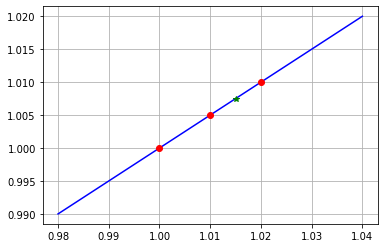

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def interpNewton(x, y, xi, grau):
  #Número de dados
  n = len(x)
  #Inicialização da diferença dividida: n x n
  fdd = [[None for x in range(n)] for x in range(n)]
  #Valores da função f(X) em vários pontos
  yint = [None for x in range(n)]

  #Encontrando diferenças divididas.
  for i in range(n):
    fdd[i][0] = y[i]
  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])

  # Imprimindo diferenças divididas.
  fdd_table = pd.DataFrame(fdd)
  #print(fdd_table)

  #Interpolação para xi.
  xterm = 1
  yint = fdd[0][0]
  for order in range(1, grau+1):
    xterm = xterm * (xi - x[order-1])
    yint = yint + fdd[0][order]*xterm

  #Retornando g(xi).
  return yint


x  = [1, 1.01, 1.02]
y  = [1, 1.005, 1.01]
xp = 1.015
grau = 1
yp = interpNewton(x, y, xp, grau)

# Valor interpolado encontrado
print('g(%.3f) = %.3f' % (xp, yp))

t  = np.arange(0.98, 1.04, 0.001)
yt = []
for i in t:
  yt.append(interpNewton(x, y, i, grau))
plt.plot(t,yt,'b-')
plt.plot(x,y,'ro')
plt.plot(xp,yp,'g*')
plt.grid()
plt.show()

# 5. Fenômeno de Runge

Seja a função $f(x) = \frac{1}{1+25x^2}$ no intervalo [-1, 1] nos pontos $x_i = -1 + \frac{2i}{n}, i = 0, 1, ..., n$.


Mostra-se que $|E_n(x)| = |f(x) - p_n(x)|$ se torna arbitrariamente grande em pontos do intervalo $[-5, 5]$, se $n$ é suficientemente grande. Esse é o fenômeno de Runge.

Dentre as alternativas para lidar com esse problema estão:

1. Trocar a aproximação em pontos igualmente espaçados por aproximação em nós de Chebyshev para redução do erro;

2. Usar funções spline.

O código a seguir mostra um gráfico da curva $f(x)$, o polinômio de grau $n = 10$ que interpola $f(x)$ em $x_i, i = 0, ..., 10$ e o polinômio de Chebyshev que a interpola nos pontos $\overline{x_i} = cos(\frac{2i+1}{n+1}\frac{\pi}{2})$.


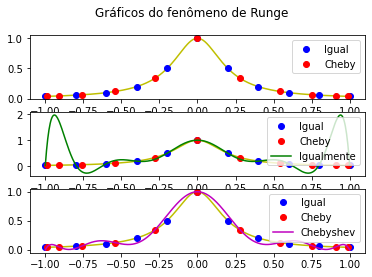

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def interpNewton(x, y, xi, grau):
  #Número de dados
  n = len(x)
  #Inicialização da diferença dividida: n x n
  fdd = [[None for x in range(n)] for x in range(n)]
  #Valores da função f(X) em vários pontos
  yint = [None for x in range(n)]

  #Encontrando diferenças divididas.
  for i in range(n):
    fdd[i][0] = y[i]
  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])

  # Imprimindo diferenças divididas.
  fdd_table = pd.DataFrame(fdd)
  #print(fdd_table)

  #Interpolação para xi.
  xterm = 1
  yint = fdd[0][0]
  for order in range(1, grau+1):
    xterm = xterm * (xi - x[order-1])
    yint = yint + fdd[0][order]*xterm

  #Retornando g(xi).
  return yint


# Função: f(x) = 1/(1 + 25x^2).
def runge(x):
  return 1 / (1 + 25 * x ** 2)

# Nós de Chebyshev.
def cheby_nodes(x0, x1, n):
  return (x1 - x0)*(np.cos((2*np.arange(1, n + 1) - 1)/(2*n)*np.pi) + 1)/2  + x0


x0 = -1
x1 = 1
x  = np.linspace(x0, x1, 500)
t1 = np.linspace(x0, x1, 11)
t2 = cheby_nodes(x0, x1, 11)

fig, axs = plt.subplots(3)
fig.suptitle('Gráficos do fenômeno de Runge')

# Só os pontos.
axs[0].plot(x,runge(x),'y-')
axs[0].plot(t1,runge(t1),'bo',label = 'Igual')
axs[0].plot(t2,runge(t2),'ro',label = 'Cheby')
axs[0].legend()

# Pontos e interpolação igualmente espaçado.
axs[1].plot(x,runge(x),'y-')
axs[1].plot(t1,runge(t1),'bo',label = 'Igual')
axs[1].plot(t2,runge(t2),'ro',label = 'Cheby')
yt1 = []
for i in x:
  yt1.append(interpNewton(t1, runge(t1), i, 10))
axs[1].plot(x,yt1,'g-',label='Igualmente')
axs[1].legend()

# Pontos e interpolação com pontos de Chebyshev.
axs[2].plot(x,runge(x),'y-')
axs[2].plot(t1,runge(t1),'bo',label = 'Igual')
axs[2].plot(t2,runge(t2),'ro',label = 'Cheby')
yt2 = []
for i in x:
  yt2.append(interpNewton(t2, runge(t2), i, 10))
axs[2].plot(x,yt2,'m-',label='Chebyshev')
axs[2].legend()

plt.show()

# 6. Splines

Considere a função f(x) tabelada nos pontos $x_0$ < $x_1$ < .... < $x_n$. Uma função $S_p(x)$ é denominada spline de grau p com nós nos pontos $x_i$, $i = 1, 2, ..., n$ se satisfaz as seguintes condições:

1. Em cada subintervalo $[x_i, x_{i+1}]$, $i = 0, 1, ..., (n-1)$, $S_p(x)$ é um polinômio de grau p: $S_p(x)$;

2. $S_p(x)$ é contínua e tem derivada contínua até ordem $(p - 1)$ em $[a, b]$;

3. Se $S_p(xi) = f(x_i)$, $i = 0, 1, ..., n$, então será denominada Spline interpolante.





## 6.1. Spline linear interpolante

A função Spline linear interpolante de $f(x)$, $S_1(x)$, nos nós $x_0$, $x_1$, ..., $x_n$, pode ser escrita em cada subintervalo $[x_{i-1}, x_i]$, $i = 1, 2, ..., n$ como:

$s_i = f(x_{i-1}) \frac{x_i - x}{x_i - x_{i-1}} + f(x_{i}) \frac{x - x_{i-1}}{x_i - x_{i-1}}, \forall x \in [x_{i-1},x_i]$.


> As seguintes propriedades são atendidas:

> 1. $S_1(x)$ é polinômio de grau 1 em cada subintervalo $[x_{i-1}, x_i]$;

> 2. $S_1(x)$ é contínua em $(x_{i-1}, x_i)$, pois $s_i(x_i) = s_{i+1}(x_i) = f(x_i)$;

> 3. Como $f(x_i) = S_1(x)$ é Spline linear interpolante de $f(x)$.





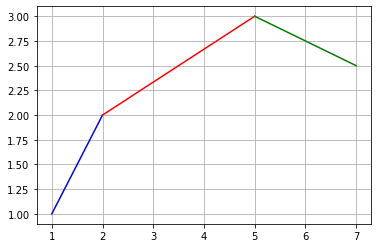

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def splineLinear(xi,xiant,fxi,fxiant,x):
  si = (fxiant*(xi-x))/(xi-xiant) + (fxi*(x-xiant))/(xi-xiant)
  return si

def SLM(xi,xiant,fxi,fxiant,t):
  yt = []
  for i in t:
    yt.append(splineLinear(xi,xiant,fxi,fxiant,i))
  return yt


# Dados
x  = [1, 2, 5, 7]
fx = [1, 2, 3, 2.5]

t1  = np.linspace(1, 2, 10)
s1 = SLM(x[1],x[0],fx[1],fx[0],t1)

t2  = np.linspace(2, 5, 10)
s2 = SLM(x[2],x[1],fx[2],fx[1],t2)

t3  = np.linspace(5, 7, 10)
s3 = SLM(x[3],x[2],fx[3],fx[2],t3)

plt.plot(t1,s1,'b-')
plt.plot(t2,s2,'r-')
plt.plot(t3,s3,'g-')
plt.grid()
plt.show()

## 6.2. Spline cúbica interpolante

A spline linear apresenta a desvantagem de ter derivada primeira descontínua nos nós. Uma spline quadrática terá derivadas contínuas até ordem 1 e a sua curvatura pode trocar nos nós. Por esse motivo as splines cúbicas são mais usadas, pois tem derivada primeira e segunda contínuas.

A função Spline cúbica interpolante de $f(x)$, $S_3(x)$, nos nós $x_0, x_1, ..., x_n$, é escrita em cada subintervalo $[x_{k-1}, x_k], k = 1, 2, ..., n$ com n polinômios $s_k$ de grau 3 tais que:


1. $S_3(x) = s_k(x)$ para $x \in [x_{k-1}, x_{k}], k = 1, ..., n$;

2. $S_3(x_i) = f(x_i), i = 0, 1, ..., n$;

3. $s_k(x_k) = s_{k+1}(x_k), k = 1, 2, ..., (n - 1)$;

4. $s’_k(x_k) = s’_{k+1}(x_k), k = 1, 2, ..., (n - 1)$;

5. $s’’_k(x_k) = s’’_{k+1}(x_k), k = 1, 2, ..., (n - 1)$.


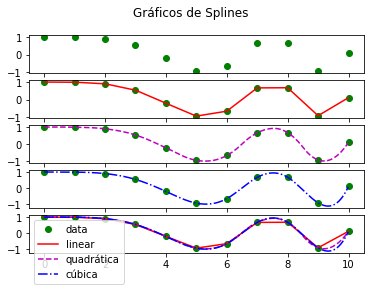

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='linear')
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')


fig, axs = plt.subplots(5)
fig.suptitle('Gráficos de Splines')

xnew = np.arange(0, 10, 0.01)

# Só os pontos.
axs[0].plot(x, y, 'go')

# Pontos e spline linear.
axs[1].plot(x, y, 'go', xnew, f1(xnew), 'r-')

# Pontos e spline quadrática.
axs[2].plot(x, y, 'go', xnew, f2(xnew),'m--')

# Pontos e spline cúbica.
axs[3].plot(x, y, 'go', xnew, f3(xnew), 'b-.')

# Todos os gráficos
axs[4].plot(x, y, 'go', xnew, f1(xnew), 'r-', xnew, f2(xnew), 'm--', xnew, f3(xnew), 'b-.')
axs[4].legend(['data', 'linear', 'quadrática', 'cúbica'], loc='best')
plt.show()